## 1 -  Analisando Dados de Pacientes

Estamos estudando inflamação em pacientes que receberam um novo tratamento para artrite, precisamos analisar a primeira dúzia de conjuntos de dados.
Os conjuntos de dados são armazenados em valores separados por vírgula no formato CSV:
cada linha contém informações para um único paciente,
e as colunas representam dias sucessivos.
As primeiras fileiras do nosso primeiro arquivo se parecem com isto:

    0,0,1,3,1,2,4,7,8,3,3,3,10,5,7,4,7,7,12,18,6,13,11,11,7,7,4,6,8,8,4,4,5,7,3,4,2,3,0,0
    0,1,2,1,2,1,3,2,2,6,10,11,5,9,4,4,7,16,8,6,18,4,12,5,12,7,11,5,11,3,3,5,4,4,5,5,1,1,0,1
    0,1,1,3,3,2,6,2,5,9,5,7,4,5,4,15,5,11,9,10,19,14,12,17,7,12,11,7,4,2,10,5,4,2,2,3,2,2,1,1
    0,0,2,0,4,2,2,1,6,7,10,7,9,13,8,8,15,10,10,7,17,4,4,7,6,15,6,4,9,11,3,5,6,3,3,4,2,3,2,1
    0,1,1,3,3,1,3,5,2,4,4,7,6,5,3,10,8,10,6,17,9,14,9,7,13,9,12,6,7,7,9,6,3,2,2,4,2,0,1,1

Nós queremos:

* carregar esses dados na memória,
* calcular a inflamação média por dia em todos os pacientes, e
* traçar o resultado.



#### Objetivos da atividade: 
- Explicar o que é uma biblioteca e para que as bibliotecas são usadas.
- Importar uma biblioteca Python e usar as funções que ela contém.
- Ler dados tabulares de um arquivo em um programa.
- Atribuir valores a variáveis.
- Selecionar valores individuais e subsecções de dados.
- Executar operações em matrizes de dados.
- Plotar gráficos simples a partir de dados.

### Armazenando Dados no Computador 
Nesta lição, aprenderemos a manipular o conjunto de dados de inflamação com o Python. Mas antes de discutir como lidar com muitos dados, mostraremos como armazenar um único valor no computador.

A linha abaixo atribui o valor 55 a variável weight_kg (Sem precisar declarar o tipo).

Quando terminar de digitar, pressione $Shift + Enter$ que o notebook executará o comando.

In [1]:
aula = 'visao computacional'

In [2]:
weight_kg = 55

Uma vez que a variável tem um valor, podemos imprimi-la:

In [ ]:
print (weight_kg)

e fazer operações aritméticas com ela:

In [ ]:
print ('peso em libras: '+str(2.2 * weight_kg))

Também podemos alterar o valor de uma variável, atribuindo-lhe um novo:

In [ ]:
weight_kg = 57.5
print ('peso em quilogramas:', weight_kg)

Como mostra o exemplo acima,podemos imprimir várias coisas ao mesmo tempo, separando-as com vírgulas.

Se imaginarmos a variável como um post-it com um nome escrito nele, a atribuição é como colar a nota em um valor particular:

<img src="files/img/python-sticky-note-variables-01.svg" alt="Variables as Sticky Notes" />

Isso significa que atribuir um valor a uma variável *não* altera os valores de outras variáveis.
Por exemplo, vamos armazenar o peso do sujeito em libras em uma variável:

In [ ]:
weight_lb = 2.2 * weight_kg
print ('weight in kilograms:', weight_kg, 'and in pounds:', weight_lb)

<img src="files/img/python-sticky-note-variables-02.svg" alt="Creating Another Variable" />

e então mudar a variável `weight_kg`:

In [ ]:
weight_kg = 100.0
print ('weight in kilograms is now:', weight_kg, 'and weight in pounds is still:', weight_lb)

<img src="files/img/python-sticky-note-variables-03.svg" alt="Updating a Variable" />

Uma vez que `weight_lb` não "se lembra" de onde seu valor veio, ela não é atualizada automaticamente quando `weight_kg` muda.

>#### DICA
>Você pode usar o comando% whos a qualquer momento para ver quais variáveis você criou e quais módulos você carregou na memória do computador. Como este é um comando IPython, ele só funcionará se você estiver em um terminal IPython ou no Notebook Jupyter.


In [3]:
%whos

Variable    Type    Data/Info
-----------------------------
aula        str     visao computacional
weight_kg   int     55


### Carregando os Dados
Palavras são úteis,
mas o que é mais útil ainda são as frases e histórias que podemos construir com elas.
Da mesma forma,
enquanto muitas ferramentas poderosas são incorporadas a lingaugens como o Python,
ainda mais utilidades nas [bibliotecas](http://swcarpentry.github.io/python-novice-inflammation-2.7/reference.html#library) são construídas.

Para carregar nossos dados de inflamações,
precisamos [importar](http://swcarpentry.github.io/python-novice-inflammation-2.7/reference.html#import) uma biblioteca chamada NumPy
que sabe operar em matrizes:

In [6]:
import numpy

Importar uma biblioteca é como tirar um equipamento de laboratório de um armário de armazenamento
e configurando-o no banco.
Uma vez que está pronto,
podemos pedir à biblioteca que leia nosso arquivo de dados para nós:

In [7]:
numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

array([[0., 0., 1., ..., 3., 0., 0.],
       [0., 1., 2., ..., 1., 0., 1.],
       [0., 1., 1., ..., 2., 1., 1.],
       ...,
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

A expressão `numpy.loadtxt (...)` é uma [chamada de função](http://swcarpentry.github.io/python-novice-inflammation-2.7/reference.html#function-call)
que pede ao Python para executar a função `loadtxt` que pertence à biblioteca `numpy`.
Esta [notação com ponto](http://swcarpentry.github.io/python-novice-inflammation-2.7/reference.html#dotted-notation) é usada em todos os lugares em Python
para se referir às partes de coisas como `todo.parte`.

`numpy.loadtxt` tem dois [parâmetros](http://swcarpentry.github.io/python-novice-inflammation-2.7/reference.html#parameter):
o nome do arquivo que queremos ler,
e o [delimitador](http://swcarpentry.github.io/python-novice-inflammation-2.7/reference.html#delimiter) que separa valores em uma linha.
Estes dois precisam ser cadeias de caracteres (ou [strings](http://swcarpentry.github.io/python-novice-inflammation-2.7/reference.html#string) para abreviar),
então os colocamos entre aspas.

O notebook executa nosso comando. Como não dissemos a ele para fazer algo com a saída da função, o notebook exibe isso.
Nesse caso, essa saída é o dado que acabamos de carregar.
Por padrão, apenas algumas linhas e colunas são mostradas
(com `...` para omitir elementos ao exibir grandes arrays).
Para economizar espaço,
Python exibe números como `1.` em vez de` 1.0`
quando não há nada interessante após o ponto decimal.

Nossa chamada para `numpy.loadtxt` leu nosso arquivo, mas não salvou os dados na memória.
Para fazer isso,
nós precisamos [atribuir](http://swcarpentry.github.io/python-novice-inflammation-2.7/reference.html#assignment) a matriz para uma [variável](http://swcarpentry.github.io/python -novice-inflammation-2.7 / reference.html # variable).
Uma variável é apenas um nome para um valor, como `x`,` current_temperature` ou `subject_id`.
Podemos criar uma nova variável simplesmente atribuindo-lhe um valor usando `=`, sem precisar declarar o seu tipo. Vamos rodar `numpy.loadtxt` novamente e salvar seu resultado:

In [8]:
data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

Esta declaração não produz qualquer saída porque a atribuição não exibe nada.
Se quisermos verificar se nossos dados foram carregados, podemos imprimir o valor da variável:

In [9]:
print (data)

[[0. 0. 1. ... 3. 0. 0.]
 [0. 1. 2. ... 1. 0. 1.]
 [0. 1. 1. ... 2. 1. 1.]
 ...
 [0. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 1. ... 1. 1. 0.]]


#### Exercícios

1. Desenhe diagramas mostrando quais variáveis se referem aos valores após cada declaração no seguinte programa:
    ~~~python
    mass = 47.5
    age = 122
    mass = mass * 2.0
    age = age - 20
    ~~~

2.  O que o programa a seguir imprime?

    ~~~python
    first, second = 'Grace', 'Hopper'
    third, fourth = second, first
    print (third, fourth)
    ~~~

In [7]:
first, second= 'Grace','Hopper'
third, fourth= second, first
print (third, fourth)

Hopper Grace


In [ ]:
mass= 47.5
age=122
mass= mass*2.0
age=age-20

In [ ]:
print (mass)

In [ ]:
print (age)

### Manipulando os Dados

Agora que nossos dados estão na memória, podemos começar a fazer coisas com eles.
Primeiro,
vamos perguntar a qual [tipo](http://swcarpentry.github.io/python-novice-inflammation-2.7/reference.html#data-type) de coisa `data` se refere:

In [8]:
print (data.dtype)

float64


O resultado nos diz que `data` atualmente se refere a uma matriz N-dimensional criada pela biblioteca NumPy.
Podemos ver como que é  o [formato/shape](http://swcarpentry.github.io/python-novice-inflammation-2.7/reference.htm#shape) desta forma:

In [9]:
print (data.shape)

(60, 40)


Isso nos diz que `data` possui 60 linhas e 40 colunas.
`data.shape` é um [membro](http://swcarpentry.github.io/python-novice-inflammation-2.7/reference.htm#member) de `data`,
isto é, um valor que é armazenado como parte de um valor maior.
Usamos a mesma notação pontilhada para os membros de valores que usamos para as funções em bibliotecas porque eles têm o mesmo relacionamento parte-todo.

Se quisermos obter um único valor da matriz, devemos fornecer um [índice](http://swcarpentry.github.io/python-novice-inflammation-2.7/reference.htm#index) entre colchetes, assim como fazemos em matemática:

In [10]:
print ('first value in data:', data[0, 0])

first value in data: 0.0


In [11]:
print ('middle value in data:', data[15, 2])

middle value in data: 1.0


A expressão `data [30, 20]` pode não surpreendê-lo, mas `data [0, 0]` pode.
Linguagens de programação como Fortran e MATLAB começam a contar às 1,
porque isso é o que os seres humanos fizeram há milhares de anos.
Idiomas na família C (incluindo C ++, Java, Perl e Python) contagem de 0
porque isso é mais simples para os computadores fazerem.
Como um resultado,
se tivermos um M&times;N array em Python,
seus índices vão de 0 a M-1 no primeiro eixo
e 0 a N-1 no segundo.
Demora um pouco de acostumar,
mas uma maneira de lembrar a regra é que
O índice é o número de passos que temos que tomar desde o início para obter o item que queremos.

<img src="files/img/python-zero-index.png" alt="Indexação do Python" />

> #### Nota
>
> O que também pode surpreender você é que quando o Python exibe uma matriz,
> mostra o elemento com índice `[0, 0]` no canto superior esquerdo
> em vez da inferior esquerda.
> Isso é consistente com a forma como os matemáticos desenham matrizes,
> mas diferente das coordenadas cartesianas.
> Os índices são (linha, coluna) em vez de (coluna, linha) pelo mesmo motivo.

Um índice como `[30, 20]` seleciona um único elemento de uma matriz,
mas também podemos selecionar seções inteiras.
Por exemplo,
podemos selecionar os primeiros dez dias (colunas) de valores
para as primeiras quatro (linhas) pacientes como este:

In [17]:
print (data[:4, 10:])

[[  3.   3.  10.   5.   7.   4.   7.   7.  12.  18.   6.  13.  11.  11.
    7.   7.   4.   6.   8.   8.   4.   4.   5.   7.   3.   4.   2.   3.
    0.   0.]
 [ 10.  11.   5.   9.   4.   4.   7.  16.   8.   6.  18.   4.  12.   5.
   12.   7.  11.   5.  11.   3.   3.   5.   4.   4.   5.   5.   1.   1.
    0.   1.]
 [  5.   7.   4.   5.   4.  15.   5.  11.   9.  10.  19.  14.  12.  17.
    7.  12.  11.   7.   4.   2.  10.   5.   4.   2.   2.   3.   2.   2.
    1.   1.]
 [ 10.   7.   9.  13.   8.   8.  15.  10.  10.   7.  17.   4.   4.   7.
    6.  15.   6.   4.   9.  11.   3.   5.   6.   3.   3.   4.   2.   3.
    2.   1.]]


O [intervalo](http://swcarpentry.github.io/python-novice-inflammation-2.7/reference.htm#slice) `0: 4` significa:
"Comece no índice 0 e vá até, mas não incluído, o índice 4."
Novamente, o até-mas-nao-incluso pode levar um tempo para acostumar,
mas a regra é que a diferença entre os limites superior e inferior é o número de valores no intervalo.

Não temos que começar, necessariamente, intervalos em 0:

In [13]:
print (data[5:10, 0:10])

[[ 0.  0.  1.  2.  2.  4.  2.  1.  6.  4.]
 [ 0.  0.  2.  2.  4.  2.  2.  5.  5.  8.]
 [ 0.  0.  1.  2.  3.  1.  2.  3.  5.  3.]
 [ 0.  0.  0.  3.  1.  5.  6.  5.  5.  8.]
 [ 0.  1.  1.  2.  1.  3.  5.  3.  5.  8.]]


e não precisamos acessar todos os valores do intervalo  --- se fornecemos um [passo](http://swcarpentry.github.io/python-novice-inflammation-2.7/reference.htm#stride),
Python pega os valores espaçados com o `passo` definido:

In [14]:
print (data[0:10:3, 0:10:2])

[[ 0.  1.  1.  4.  8.]
 [ 0.  2.  4.  2.  6.]
 [ 0.  2.  4.  2.  5.]
 [ 0.  1.  1.  5.  5.]]


Aqui,
nós pegamos as linhas 0, 3, 6 e 9,
e as colunas 0, 2, 4, 6 e 8.
(Novamente, sempre incluímos o limite inferior,
mas pare quando alcançamos ou cruzamos o limite superior.)

Também não precisamos incluir o limite superior e inferior do intervalo.
Se não incluímos o limite inferior, Python usa 0 por padrão;
se não incluímos o superior,
o intervalo corre até o final do eixo, e se não incluímos nenhum
(isto é, se usarmos apenas ':' por conta própria)
O intervalo inclui tudo:

In [18]:
small = data[:3, 36:]
print ('small is:')
print (small)

small is:
[[ 2.  3.  0.  0.]
 [ 1.  1.  0.  1.]
 [ 2.  2.  1.  1.]]


Arrays também sabem como executar operações matemáticas comuns em seus valores.
Se queremos encontrar a inflamação média para todos os pacientes em todos os dias,
por exemplo, podemos pedir a matriz pelo seu valor médio:

In [19]:
print (data.mean())

6.14875


In [26]:
numpy.zeros((3,10,10))

array([[[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,

`mean` é um [método](http://swcarpentry.github.io/python-novice-inflammation-2.7/reference.htm#method) da matriz,
isto é, uma função que lhe pertence
da mesma forma que o `shape` do membro faz.
Se as variáveis são substantivos, os métodos são verbos:
Eles são o que o assunto em questão sabe como fazer.
É por isso que `data.shape` não precisa ser chamado
(é só uma coisa)
mas `data.mean ()` faz
(é uma ação).
É também por isso que precisamos de parênteses vazios para `data.mean ()`:
mesmo quando não passamos em nenhum parâmetro,
parênteses são como dizer ao Python para ir e fazer algo por nós.

As matrizes numPy têm muitos métodos úteis:

In [27]:
print ('maximum inflammation:', data.max())
print ('minimum inflammation:', data.min())
print ('standard deviation:', data.std())

maximum inflammation: 20.0
minimum inflammation: 0.0
standard deviation: 4.61383319712


Ao analisar dados,
muitas vezes queremos olhar para estatísticas parciais,
como o valor máximo por paciente
ou o valor médio por dia.
Uma maneira de fazer isso é selecionar os dados que queremos para criar uma nova matriz temporária, e então fazer o cálculo:

In [10]:
patient_0 = data[0, :] # 0 on the first axis, everything on the second
print ('maximum inflammation for patient 0:', patient_0.max())

maximum inflammation for patient 0: 18.0


Na verdade, não precisamos armazenar a linha em uma variável própria.
Em vez disso, podemos combinar a seleção e o método de chamada:

In [13]:
print ('maximum inflammation for patient 2:', data[2, :].max())

maximum inflammation for patient 2: 19.0


#### Exercício

Uma subseção de uma matriz é chamada de [fatia](http://swcarpentry.github.io/python-novice-inflammation-2.7/reference.html#slice).
Podemos pegar fatias de strings de caracteres também:

In [30]:
element = 'oxygen'
print ('first three characters:', element[:3])
print ('last three characters:', element[3:])

first three characters: oxy
last three characters: gen


1. Qual é o valor de `element [: 4]`?
     E `element [4:]`?
     Ou `element [:]`?

1. O que é `element [-1]`?
     O que é `element [-2]`?
     Dadas essas respostas,
     explique o que `element [1: -1]` faz.

1. A expressão `element [3: 3]` produz uma [string vazia](http://swcarpentry.github.io/python-novice-inflammation-2.7/reference.html#empty-string),
     ou seja, uma string que não contém caracteres.
     Se `data` contém nossa matriz de dados de pacientes,
     O que `data [3: 3, 4: 4]` produz?
     E quanto a `data [3: 3,:]`?

### Plotando

O matemático Richard Hamming já disse,
"O objetivo da computação é gerar insights, não números"
e a melhor maneira de obter estes insights é visualizandos os dados.
A visualização merece uma leitura inteira (ou curso) própria,
mas podemos explorar alguns recursos da biblioteca `matplotlib` do Python aqui.
Primeiro,
digamos ao IPython Notebook que queremos que nossos gráficos sejam exibidos inline,
em vez de em uma janela de visualização separada:

In [15]:
%matplotlib inline

O `%` no início da linha indica que este é um comando para o notebook,
em vez de uma declaração em Python.
A seguir, vamos importar o módulo `pyplot` de ` matplotlib`
e usar duas de suas funções para criar e exibir um mapa de calor de nossos dados:

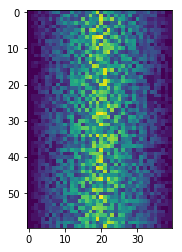

In [16]:
from matplotlib import pyplot
pyplot.imshow(data)
pyplot.show()

As regiões azuis neste mapa de calor são valores baixos, enquanto o vermelho mostra valores altos.
Como podemos ver, a inflamação aumenta e cai em um período de 40 dias.
Vamos dar uma olhada na inflamação média ao longo do tempo:

In [ ]:
data.shape

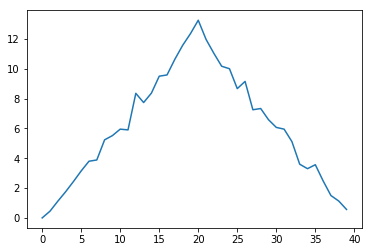

In [17]:
ave_inflammation = data.mean(axis=0)
pyplot.plot(ave_inflammation)
pyplot.show()

Aqui,
colocamos a média por dia em todos os pacientes na variável `ave_inflammation`,
então pedimos o `pyplot` para criar e exibir um gráfico de linha desses valores.
O resultado é aproximadamente um aumento linear e queda,o que é suspeito:
com base em outros estudos, esperamos um aumento mais acentuado e queda mais lenta.
Vamos dar uma olhada em outras duas estatísticas:

In [ ]:
print ('inflamação máxima por dia')
pyplot.plot(data.max(axis=0))
pyplot.show()

print ('inflamação mínima por dia')
pyplot.plot(data.min(axis=0))
pyplot.show()

O valor máximo aumenta e cai perfeitamente,
enquanto o mínimo parece ser uma função de etapas.
Nenhum resultado parece particularmente provável,
então, há um erro em nossos cálculos
ou algo está errado com nossos dados.

#### Exercício
1. Crie um gráfico que mostre o desvio padrão (numpy.std) dos dados de inflamação para cada dia em todos os pacientes.

### Resumindo

É muito comum criar um [alias](http://swcarpentry.github.io/python-novice-inflammation-2.7/reference.html#alias) (alias renomeação de bilioteca) para uma biblioteca ao importá-la
para reduzir a quantidade de digitação que temos que fazer.
Aqui estão os nossos três gráficos lado a lado usando aliases para `numpy` e` pyplot`:

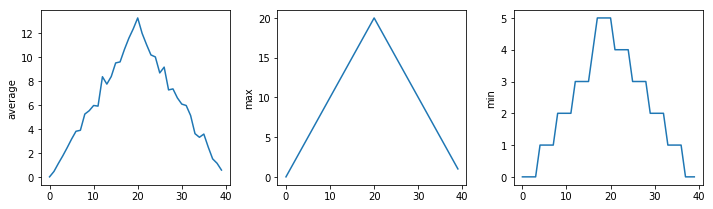

In [33]:
import numpy as np
from matplotlib import pyplot as plt

data = np.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

plt.figure(figsize=(10.0, 3.0))

plt.subplot(1, 3, 1)
plt.ylabel('average')
plt.plot(data.mean(0))

plt.subplot(1, 3, 2)
plt.ylabel('max')
plt.plot(data.max(0))

plt.subplot(1, 3, 3)
plt.ylabel('min')
plt.plot(data.min(0))

plt.tight_layout()
plt.show()

As duas primeiras linhas recarregam nossas bibliotecas como `np` e `plt`,
que são os alias que a maioria dos programadores de Python usam.
A chamada para `loadtxt` lê nossos dados,
 o resto do programa diz a biblioteca de plota os gráficos
o quão grande queremos que a figura seja,
que estamos criando três sub-gráficos,
o que desenhar para cada um,
e que queremos um layout menor.
(Perversamente,
se excluirmos essa chamada para `plt.tight_layout ()`,
os gráficos sairão realmente esticados e mais próxima.)

#### Exercício

1. Modifique o programa para exibir os três gráficos em cima um do outro em vez de lado a lado.

In [ ]:
plt.figure(figsize=(5.0, 10.0))

plt.subplot(3, 1, 1)
plt.ylabel('average')
plt.plot(data.mean(0))

plt.subplot(3, 1, 2)
plt.ylabel('max')
plt.plot(data.max(0))

plt.subplot(3, 1, 3)
plt.ylabel('min')
plt.plot(data.min(0))

plt.tight_layout()
plt.show()

#### Pontos Principais
* Importar uma biblioteca para um programa usando `import nome_da_biblioteca`.
* Usar a biblioteca `numpy` para trabalhar com arrays em Python.
* Usar `variável = valor` para atribuir um valor a uma variável e gravá-la na memória.
* As variáveis são criadas sob demanda sempre que um valor lhes é atribuído.
* Usar `print (alguma_coisa)` para exibir o valor de `alguma_coisa`.
* A expressão `array.shape` dá a forma de uma matriz.
* Usar `array [x, y]` para selecionar um único elemento de uma matriz.
* Os índices de matriz começam em 0, não 1.
* Usar `low: high` para especificar uma fatia que inclui os índices de `low` até `high-1`.
* Toda a indexação e corte que funciona em arrays também funciona em strings.
* Usar `# algum tipo de explicação` para adicionar comentários aos programas.
* Usar `array.mean ()`, `array.max ()` e `array.min ()` para calcular estatísticas simples.
* Usar `array.mean (axis = 0)` ou `array.mean (axis = 1)` para calcular estatísticas no eixo especificado.
* Usar a biblioteca `pyplot` de ` matplotlib` para criar visualizações simples.

#### Próximos passos

Nosso trabalho até agora nos convenceu de que algo está errado com nosso primeiro arquivo de dados. Gostaríamos de verificar os outros 11 da mesma maneira,
mas digitar repetidamente os mesmos comandos é tedioso e propenso a erros.
Como os computadores não ficam entediados (que sabemos)
devemos criar uma maneira de fazer uma análise completa com um único comando,
e então descobrir como repetir esse passo uma vez para cada arquivo.
Essas operações são assuntos das próximas duas lições.